In [17]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from sympy import symbols, Matrix, pi,deg, cos, sin,atan, simplify, eye, solve, latex, atan2, pprint, init_printing, Derivative, sqrt
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, init_vprinting, Point
from sklearn.metrics import mean_squared_error
from scipy.integrate import cumulative_trapezoid

-----------------------------------------------------------------PUNTO 1---------------------------------------------------------

In [18]:
#Punto 2
N = ReferenceFrame('N') #creamos un marco de referencia fijo

#escribimos las magnitudes de los vectores
magnitud_a = 10
magnitud_b = 20
magnitud_c = 35

#escribimos los angulos de los vectores
angulo_a = 90
angulo_b = 53
angulo_c = -32

#definimos el valor de cada componente de los vectores
ax = magnitud_a*cos(np.deg2rad(angulo_a))
ay =  magnitud_a*sin(np.deg2rad(angulo_a))

bx = magnitud_b*cos(np.deg2rad(angulo_b))
by =  magnitud_b*sin(np.deg2rad(angulo_b))

cx = magnitud_c*cos(np.deg2rad(angulo_c))
cy =  magnitud_c*sin(np.deg2rad(angulo_c))

#definimos los vectores usando seno y coseno y con
#los vectores unitarios de N
vector_a = (ax)*N.x + (ay)*N.y
vector_b = (bx)*N.x + (by)*N.y
vector_c = (cx)*N.x + (cy)*N.y

In [19]:
#A
#Componentes en XY y vector resultante
componentesX = [ax,bx,cx]
componentesY = [ay,by,cy]
nombre_vectores = ["a","b", "c"]
for i in range(len(nombre_vectores)):
    print("Las componentes del vector",nombre_vectores[i],"son:")
    print("En X:", round(componentesX[i],2), "\nEn Y:", round(componentesY[i],2))
    
vector_resultante = vector_a + vector_b + vector_c
print("\n\nEl vector resultante es")
pprint(vector_resultante)
print("Su componente en X es", round(vector_resultante.dot(N.x),2), "su componente en Y es", round(vector_resultante.dot(N.y),2))

Las componentes del vector a son:
En X: 0.0 
En Y: 10.0000000000000
Las componentes del vector b son:
En X: 12.04 
En Y: 15.97
Las componentes del vector c son:
En X: 29.68 
En Y: -18.55


El vector resultante es
41.7179838285159 n_x + 7.42553595278368 n_y
Su componente en X es 41.72 su componente en Y es 7.43


In [20]:
#B
#Magnitud y direccion del vector resultante
magnitud_resultante = vector_resultante.magnitude()
angulo_resultante = vector_resultante.angle_between(N.x)
print("La magnitud del vector resultante es", magnitud_resultante)
print("El ángulo con respecto al eje X del sistema de referencia es", np.rad2deg(float(angulo_resultante)),"grados")

La magnitud del vector resultante es 42.3736800254875
El ángulo con respecto al eje X del sistema de referencia es 10.092586831459226 grados


In [21]:
#c
#Proyeccion de cada vector sobre el vector resultante
vectores = [vector_a, vector_b,vector_c]
for i in range(len(vectores)):
    vector_i = vectores[i]
    proyeccion_de_vi_en_v_resultante = (vector_i.dot(vector_resultante) / vector_resultante.magnitude()**2)*vector_resultante
    print("La proyeccion del vector",nombre_vectores[i],"sobre el vector resultante es",proyeccion_de_vi_en_v_resultante)
    print("La componente en X de esta proyección es",proyeccion_de_vi_en_v_resultante.dot(N.x))
    print("La componente en Y de esta proyección es", proyeccion_de_vi_en_v_resultante.dot(N.y), "\n")


La proyeccion del vector a sobre el vector resultante es 1.72527667552181*N.x + 0.307088282004401*N.y
La componente en X de esta proyección es 1.72527667552181
La componente en Y de esta proyección es 0.307088282004401 

La proyeccion del vector b sobre el vector resultante es 14.4224142154087*N.x + 2.56709805830196*N.y
La componente en X de esta proyección es 14.4224142154087
La componente en Y de esta proyección es 2.56709805830196 

La proyeccion del vector c sobre el vector resultante es 25.5702929375854*N.x + 4.55134961247732*N.y
La componente en X de esta proyección es 25.5702929375854
La componente en Y de esta proyección es 4.55134961247732 



-----------------------------------------------------------------PUNTO 2---------------------------------------------------------

In [22]:
#Definimos el marco de referencia
N_3 = ReferenceFrame("N_3")
#magnitudes de los vectores
magnitud_v1 = symbols("v1")
magnitud_v2 = symbols("v2")

#angulos de los vectores
angulo_v1 = 30
angulo_v2 =  180 - np.rad2deg(float(atan(4/3)))

#crear componentes vectores
v1x = magnitud_v1*cos(np.deg2rad(angulo_v1))
v1y = magnitud_v1*sin(np.deg2rad(angulo_v1))

v2x = magnitud_v2*cos(np.deg2rad(angulo_v2)) 
v2y = magnitud_v2*sin(np.deg2rad(angulo_v2))

#escribir vectores
v1 = v1x*N_3.x + v1y*N_3.y
v2 = v2x*N_3.x + v2y*N_3.y

print("Vector V1", v1)
print("\nVector V2", v2)


Vector V1 0.866025403784439*v1*N_3.x + 0.5*v1*N_3.y

Vector V2 - 0.6*v2*N_3.x + 0.8*v2*N_3.y


In [23]:
#Suma
vector_suma = v1+v2
print("Vector V1+V2", vector_suma)

#Resta
vector_resta = v1-v2
print("\nVector V1-V2", vector_resta)

#Cruz
vector_cruz = v1.cross(v2)
print("\nVector V1xV2", vector_cruz)

#Suma
escalar_punto = v1.dot(v2)
print("\nEscalar V1.V2", escalar_punto)

Vector V1+V2 (0.866025403784439*v1 - 0.6*v2)*N_3.x + (0.5*v1 + 0.8*v2)*N_3.y

Vector V1-V2 (0.866025403784439*v1 + 0.6*v2)*N_3.x + (0.5*v1 - 0.8*v2)*N_3.y

Vector V1xV2 0.992820323027551*v1*v2*N_3.z

Escalar V1.V2 -0.119615242270663*v1*v2


-----------------------------------------------------------------PUNTO 3 Opcion 1---------------------------------------------------------

In [24]:
#Plantear un sistema coordenado fijo
N_fijo = ReferenceFrame("N_fi")

#Plantear un sistema de coordenadas movil
t = symbols("t")
theta0, L0 = symbols("theta0 l0")
theta_punto = np.deg2rad(60)

angulo = theta0 + theta_punto*t

A = N_fijo.orientnew("A","Axis", (angulo, N_fijo.z)) #creamos un marco de referencia que rota con respecto a A
A.set_ang_vel(N_fijo, theta_punto*N_fijo.z) #Le asignamos una velocidad angular constante a A

#Crear otro marco de referencia B que se acerque a A y que se encuentre en la punta
L = L0-150*t #cambia con el tiempo porque disminuye

#Colocamos un punto
O = Point("O") #creamos un punto
Punto_en_A = O.locatenew("Punto_en_A", 0*N_fijo.x) #Colocamos el punto en el origen

#Modelar un punto en B, como se encuentra a una distancia (no un angulo, los marco de referencia no estan a una distancia de otros), se debe usar punto
Punto_en_B = Punto_en_A.locatenew("Punto_en_B", (375+L)*A.x) #El punto B, la punta de todo, se encuentra a una distancia radial de 375+L del eje X de A

#Agregar una velocidad
Punto_en_B.set_vel(A, -150*A.x) #establecemos que la velocidad del punto B, con respecto al marco A es de -150

#Volver al punto un vector
vector_B = Punto_en_B.pos_from(O) #esto crea un vector desde el origen O hasta el punto B

velocidad_vector_B = vector_B.diff(t, N_fijo)
aceleracion_vector_B = velocidad_vector_B.diff(t,N_fijo)

print("La magnitud de la velocidad es ", velocidad_vector_B.simplify().magnitude())
print("\nLa magnitud de la aceleración es", aceleracion_vector_B.simplify().magnitude())

print("\nEs decir:")



La magnitud de la velocidad es  sqrt(((-1.0471975511966*l0 + 157.07963267949*t - 392.699081698724)*sin(1.0471975511966*t + theta0) - 150*cos(1.0471975511966*t + theta0))**2 + ((1.0471975511966*l0 - 157.07963267949*t + 392.699081698724)*cos(1.0471975511966*t + theta0) - 150*sin(1.0471975511966*t + theta0))**2)

La magnitud de la aceleración es 314.159265358979*sqrt((0.00318309886183791*(-1.09662271123215*l0 + 164.493406684823*t - 411.233516712057)*sin(1.0471975511966*t + theta0) - cos(1.0471975511966*t + theta0))**2 + (0.00318309886183791*(-1.09662271123215*l0 + 164.493406684823*t - 411.233516712057)*cos(1.0471975511966*t + theta0) + sin(1.0471975511966*t + theta0))**2)

Es decir:


In [25]:
velocidad_vector_B.simplify().magnitude()


sqrt(((-1.0471975511966*l0 + 157.07963267949*t - 392.699081698724)*sin(1.0471975511966*t + theta0) - 150*cos(1.0471975511966*t + theta0))**2 + ((1.0471975511966*l0 - 157.07963267949*t + 392.699081698724)*cos(1.0471975511966*t + theta0) - 150*sin(1.0471975511966*t + theta0))**2)

In [26]:
aceleracion_vector_B.simplify().magnitude()


314.159265358979*sqrt((0.00318309886183791*(-1.09662271123215*l0 + 164.493406684823*t - 411.233516712057)*sin(1.0471975511966*t + theta0) - cos(1.0471975511966*t + theta0))**2 + (0.00318309886183791*(-1.09662271123215*l0 + 164.493406684823*t - 411.233516712057)*cos(1.0471975511966*t + theta0) + sin(1.0471975511966*t + theta0))**2)

-----------------------------------------------------------------PUNTO 3 Opcion 2---------------------------------------------------------

In [27]:
#Utilizando la version simplificada de la complementaria
#variables
theta2_0 = symbols("theta2_0") #creamos al angulo simbolico
theta2_punto = np.deg2rad(60) #creamos a theta punto
t_2 = symbols("t_2") #creamos el tiempo

theta2 = theta2_0 + theta2_punto*t_2 #escribimos al angulo en verdad, el angulo + la diferencia
l0_2 = symbols("l0_2") #creamos a la longitud L simbolica
l = l0_2 - 150*t_2 #creamos a la longitud L verdadera

#marcos de referencia
N_fijo_2 = ReferenceFrame("N_fijo_2")
A_movil_2 = N_fijo_2.orientnew("A_movil_2", "Axis", (theta2, N_fijo_2.z))

#Crear al vector posicion
vector_pos = (375+l)*A_movil_2.x #creamos al vector de posicion cuya unica coordenada es radial

velocidad_vector_pos = vector_pos.diff(t_2,N_fijo_2)
aceleracion_vector_pos = velocidad_vector_pos.diff(t_2, N_fijo_2)


In [28]:
velocidad_vector_pos.simplify().magnitude()

sqrt(((-1.0471975511966*l0_2 + 157.07963267949*t_2 - 392.699081698724)*sin(1.0471975511966*t_2 + theta2_0) - 150*cos(1.0471975511966*t_2 + theta2_0))**2 + ((1.0471975511966*l0_2 - 157.07963267949*t_2 + 392.699081698724)*cos(1.0471975511966*t_2 + theta2_0) - 150*sin(1.0471975511966*t_2 + theta2_0))**2)

In [29]:
aceleracion_vector_pos.simplify().magnitude()

314.159265358979*sqrt((0.00318309886183791*(-1.09662271123215*l0_2 + 164.493406684823*t_2 - 411.233516712057)*sin(1.0471975511966*t_2 + theta2_0) - cos(1.0471975511966*t_2 + theta2_0))**2 + (0.00318309886183791*(-1.09662271123215*l0_2 + 164.493406684823*t_2 - 411.233516712057)*cos(1.0471975511966*t_2 + theta2_0) + sin(1.0471975511966*t_2 + theta2_0))**2)

In [30]:
#Realizar pruebas de valores
angulo_inicial = 60 #este valor no afecta el calculo de la velocidad
longitud_l = 1000 #este es la inicial, sí afecta la velocidad
tiempo = 30 #sí afecta la velocidad
velocidad_calculada = velocidad_vector_pos.subs({theta2_0:np.deg2rad(angulo_inicial),l0_2: longitud_l, t_2:tiempo, Derivative(theta2_0):0}).magnitude().simplify()
print("La magnitud de la velocidad es", velocidad_calculada)

La magnitud de la velocidad es 3275.92829048141


In [31]:
#Realizar pruebas de valores
angulo_inicial = 60 #este valor no afecta el calculo de la velocidad
longitud_l = 1000 #este es la inicial, sí afecta la velocidad
tiempo = 30 #sí afecta la velocidad
aceleracion_calculada = aceleracion_vector_pos.subs({theta2_0:np.deg2rad(angulo_inicial),l0_2: longitud_l, t_2:tiempo}).magnitude().simplify()
print("La magnitud de la aceleracion es", aceleracion_calculada)

La magnitud de la aceleracion es 3441.31584472182


-----------------------------------------------------------------PUNTO 4---------------------------------------------------------

In [32]:
#Cargar archivo
archivo = pd.read_csv("bbox.csv", sep=";") #cargar el archivo csv, que no se encuentra separado por comas , sino por punto y coma ; , por eso el ;

Text(0, 0.5, 'Velocidad (km/h)')

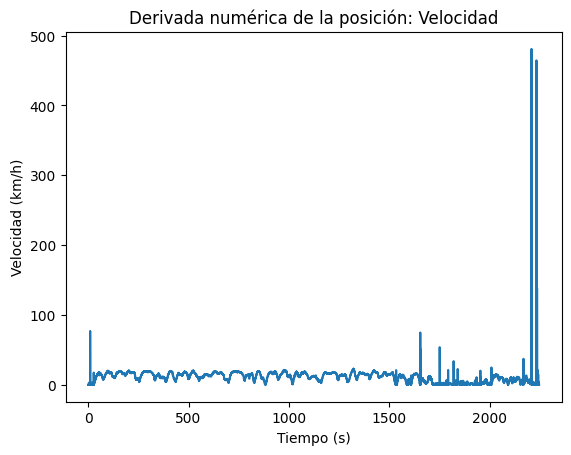

In [33]:
#PUNTO 1
#¿Qué es derivar numéricamente? 
#Una derivada se puede entender como una tasa de cambio entre el valor de una función y un instante de tiempo
#Entonces una derivada en un punto es la diferencia entre el punto actual y el punto siguiente, divido por una diferencia de tiempo
#Para esto, tenemos la columna de distancia, ya que es la que queremos derivar, y el elapse time
#Luego lo que hacemos tomar todas las filas de la columna Distance (m) del dataframe y restarlas con las .shift(-1), que se encarga de desplazar las filas hacia arriba
#Haciendo que la segunda fila, ahora sea la primera. Pertiendo restar la segunda fila con la primera al restar directamente estas dos series de Pandas.

#Luego restando ambas filas obtenemos la diferencia de distancias, que sería el cambio en el valor de una función
#Luego, hacemos lo mismo con el tiempo
#Creamos una nueva columna en el dataframe: "derivada"
archivo["derivada_posicion"] = (archivo["Distance (m)"].shift(-1) - archivo["Distance (m)"]) / (archivo["Elapsed time (s)"].shift(-1) - archivo["Elapsed time (s)"])

#En la última fila queda NaN ya que no hay valor siguiente. Por tanto, lo asignamos a 0
archivo.loc[archivo.index[-1], "derivada_posicion"] = 0

#Graficar los valores
plt.plot(archivo["Elapsed time (s)"], archivo["derivada_posicion"])
plt.title("Derivada numérica de la posición: Velocidad")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (km/h)")


Text(0, 0.5, 'Posición (km)')

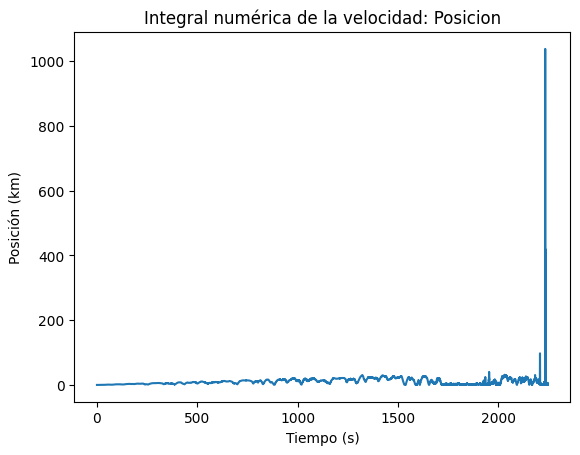

In [34]:
#Punto 2: Integración numérica
#Una integral por series de Riemman uno aprende que se puede aproximar como un rectángulo
#Cuya base es la diferencia de tiempo y la altura hay dos: la de un lado de la velocidad o de otro lado de la velocidad
#Ahí ya depende si se quiere aproximar la integral por la izquierda o por la derecha
#Aproximenos por el lado izquierdo, entonces como es un rectángulo solo es base (tiempo) * altura (velocidad)
#También tiene sentido porque V = delta X / delta T, luego deltaX = V*delta T
#Para esto, lo podemos hacer crear una nueva columna: integral_velocidad

#Es importante recordar que la velocidad que vamos a integrar es la de los datos: Speed (km/h

archivo["integral_velocidad"] = archivo["Speed (km/h)"] *  (archivo["Elapsed time (s)"]/3600) #Convertimos las horas en segundos para que se puedan multiplicar

plt.plot(archivo["Elapsed time (s)"], archivo["integral_velocidad"])
plt.title("Integral numérica de la velocidad: Posicion")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (km)")

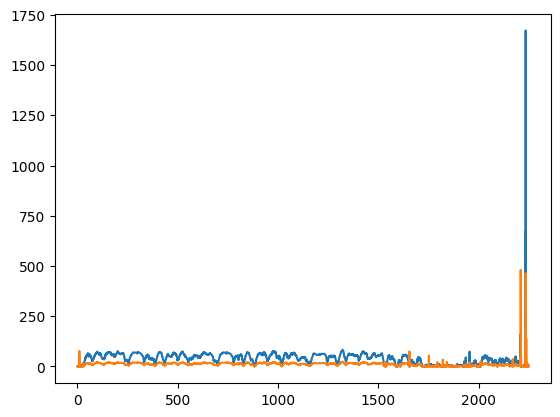

In [35]:
#Punto C: Comparar velocidades ambas en una misma gráfica
plt.plot(archivo["Elapsed time (s)"], archivo["Speed (km/h)"]) #Velocidad medida por el VBOX Sport
plt.plot(archivo["Elapsed time (s)"], archivo["derivada_posicion"]) #Velocidad medida a partir de la derivada de la posicion


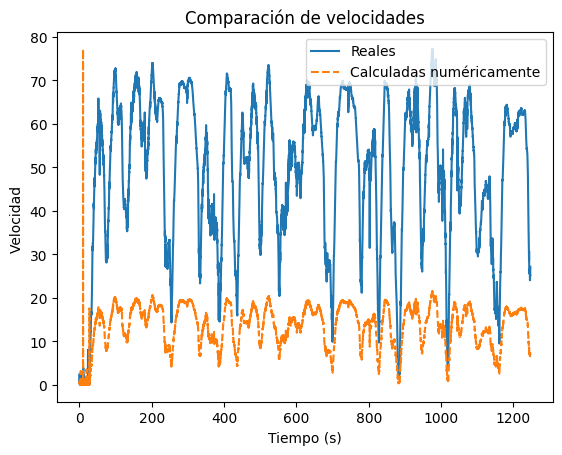

In [36]:
#Como en los datos anterior el dato final es muy superior al resto, es relevante delimitar los datos para apreciarlos mejor
#Para esto, no tengamos en cuenta a los ultimos 20.000 datos, del total de 44.942 datos
plt.plot(archivo["Elapsed time (s)"].iloc[:-20000], archivo["Speed (km/h)"].iloc[:-20000], label ="Reales", linestyle="-") 
plt.plot(archivo["Elapsed time (s)"].iloc[:-20000], archivo["derivada_posicion"].iloc[:-20000], label = "Calculadas numéricamente", linestyle="--") 

plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad ")
plt.title("Comparación de velocidades")

plt.legend(loc="best")  #pone a la leyenda en la mejor posicion

Podemos notar que hay diferencias marcadas particularmente en la amplitud de la ondas. 
Así, es claro que los valores reales de la velocidad son mucho mayores a los valores calculados.
Por ejemplo, a los 200 segundos, el valor calculado de velocidad es de alrededor de 15 mientras que el valor real es alrededor de 65. 
Esta diferencia se debe a las unidades: se calculó la velocidad como el cambio de la distancia (medida en metros) dividido por el cambio del tiempo (segundos) resultando con una velocidad con unidades de m/s.
Por otro lado, la velocidad (Speed) reportada en los datos está medida en Km/h. Esto hace que los datos difieran en el órden de 3.6 veces (3600 sec = 1 hora, 1000 km = 1 m). Realizando esta corrección a la derivada_posicion, obtenemos que:

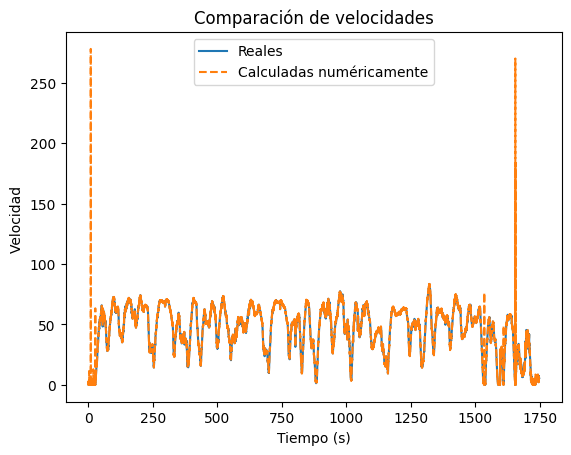

In [37]:
archivo["derivada_posicion"] = archivo["derivada_posicion"]*(3600/1000) #Convertimos de m/s a km/h ya que estas son las unidades de la velocidad en el archivo
plt.plot(archivo["Elapsed time (s)"].iloc[:-10000], archivo["Speed (km/h)"].iloc[:-10000], label ="Reales", linestyle="-") 
plt.plot(archivo["Elapsed time (s)"].iloc[:-10000], archivo["derivada_posicion"].iloc[:-10000], label = "Calculadas numéricamente", linestyle="--") 

plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad ")
plt.title("Comparación de velocidades")

plt.legend(loc="best")  #pone a la leyenda en la mejor posicion

Esta vez, podemos observar que las diferencias son muy pocas o prácticamente nulas. Para saber cuánto es el error, podemos utilizar el error cuadrático medio sin cambiar las unidades y luego cambiándolas

In [38]:
print("Error con cambiar unidades:",mean_squared_error( archivo["derivada_posicion"],  archivo["Speed (km/h)"]))
print("Error sin cambiar unidades:",mean_squared_error( archivo["derivada_posicion"]*(1000/3600),  archivo["Speed (km/h)"])) #multiplicamos por el inverso de 3600/1000 para revertir el cambio que hicimos en el código anterior

Error con cambiar unidades: 81.15942881348253
Error sin cambiar unidades: 1307.0154045681766


Podemos observar que el error no es muy grande teniendo en cuenta que seguramente en los extremos exista la mayores fuentes de error. Limitandonos a únicamente los datos quitando 1000 datos de los extremos tenemos que:

In [39]:
print("Error con cambiar unidades y sin extremos:",mean_squared_error( archivo["derivada_posicion"].iloc[1000:-1000],  archivo["Speed (km/h)"].iloc[1000:-1000]))

Error con cambiar unidades y sin extremos: 5.085291206746704


Quitando estos 2.000 datos, 1000 a cada lado, que son pocos comparado con los 44.942 que hay en total, notamos que en efecto el error es muy pequeño. Pudo suceder al principio y al final que una discontinuidad o diferencia muy poca entre dos tiempos (recuerde que estamos dividiendo por una diferencia de tiempo) sea tan poca que elevara de gran forma el valor que se obtuvo en el numerador al restar las distancias. 
En cualquier caso, parece ser que la aproximación de la derivada utilizada es un buen estimador de la derivada real.


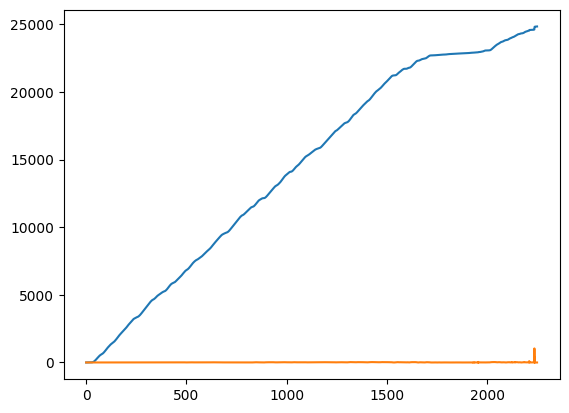

In [40]:
#PUNTO D:Comparar distancias
#Gráfica de ambas:
#Punto C: Comparar velocidades ambas en una misma gráfica
plt.plot(archivo["Elapsed time (s)"], archivo["Distance (m)"]) #distancia medida por el VBOX Sport
plt.plot(archivo["Elapsed time (s)"], archivo["integral_velocidad"]) #distancia medida a partir de la integral de la velocidad

Podemos notar lo mismo que antes. No son comparables debido a que la distancia está en meros y la integral de la velocidad está en kilómetros. Realizando este cambio, obtenemos que:

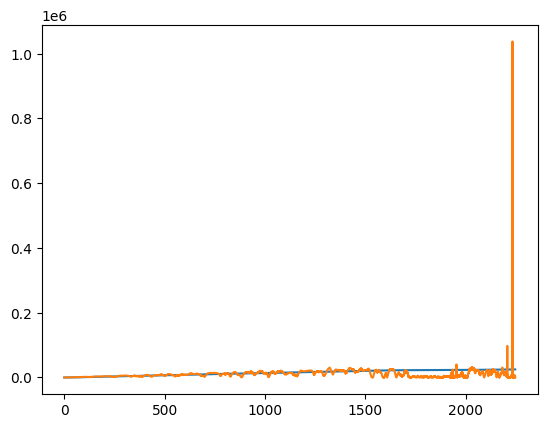

In [41]:
archivo["integral_velocidad"] = archivo["integral_velocidad"]*1000 #pasar de km a m
plt.plot(archivo["Elapsed time (s)"], archivo["Distance (m)"]) #distancia medida por el VBOX Sport
plt.plot(archivo["Elapsed time (s)"], archivo["integral_velocidad"]) #distancia medida a partir de la integral de la velocidad

Podemos evidenciar que el error es poco si ignoramos el extremo derecho donde hay un crecimiento exponencial, quizás debido a la diferencia entre tiempos. Acotando la gráfica obtenemos que:

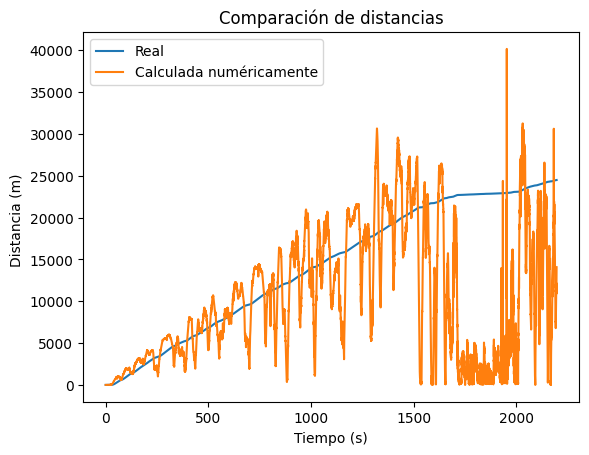

In [42]:
plt.plot(archivo["Elapsed time (s)"].iloc[:-1000], archivo["Distance (m)"].iloc[:-1000], label = "Real") #distancia medida por el VBOX Sport
plt.plot(archivo["Elapsed time (s)"].iloc[:-1000], archivo["integral_velocidad"].iloc[:-1000], label = "Calculada numéricamente") #distancia medida a partir de la integral de la velocidad

plt.xlabel("Tiempo (s)")
plt.ylabel("Distancia (m) ")
plt.title("Comparación de distancias")

plt.legend(loc="best")  #pone a la leyenda en la mejor posicion

Esta vez observamos que existen grandes errores dado que, si bien las líneas naranjas tienen una tendencia parecida a la línea continua azul, no se asemejan. Calculemos el error nuevamente sin tener en cuenta los extremos de 1000:

In [43]:
print("Error con cambiar unidades y sin extremos:",mean_squared_error( archivo["integral_velocidad"].iloc[1000:-1000],  archivo["Distance (m)"].iloc[1000:-1000]))

Error con cambiar unidades y sin extremos: 92201017.75931777


Observamos que el error es absurdamente grande entendiendo que si bien se denota una tendencia, existe mucha variación. Concluimos que ese método para calcular la integral NO es bueno. Una mejor aproximación sería utilizar el método del trapecio:

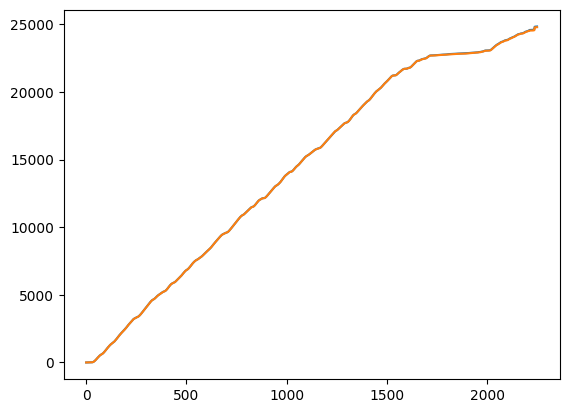

In [44]:
#Este método del trapecio acumulado utiliza la velocidad, el tiempo y un valor inicial
tiempo = archivo["Elapsed time (s)"]/3600
posicion = cumulative_trapezoid(archivo["Speed (km/h)"], tiempo, initial=0) #pasamos los segundos a horas
posicion = posicion*1000 #cambiamos de km a m
#Graficamos
plt.plot(archivo["Elapsed time (s)"], archivo["Distance (m)"]) 
plt.plot(archivo["Elapsed time (s)"], posicion) 

Podemos evidenciar que esta técnica de integración es mucho mejor que simplemente multiplicar la velocidad por el tiempo. Calcuelmos el error:

In [45]:
print("Error:",mean_squared_error(  archivo["Distance (m)"],  posicion))

Error: 139.58203957917368


Concluimos que esta técnica del trapezoide es muchísimo mejor que la anteriormente presentada dado que es miles de veces menor. Por anto, es normal que este error se produzca pues se pierde información al integrar aunque este método lo realiza casi perfectamente. El error obtenido es mínimo comparado con el otro método. Conclumios que el mejor método para calcular una integral es el del trapezoide.